In [2]:
!pip install openpyxl

In [3]:
!pip install xlrd

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import os
from openpyxl.workbook import Workbook
warnings.simplefilter("ignore")

In [5]:
#os nomes das tabelas estão iguais baixei do kaggle
games = pd.read_csv('arquivos/games.csv')
pffscout = pd.read_csv('arquivos/pffScoutingData.csv')
players = pd.read_csv('arquivos/players.csv')
plays = pd.read_csv('arquivos/plays.csv')
week_1 = pd.read_csv('arquivos/week1.csv')
week_2 = pd.read_csv('arquivos/week2.csv')
week_3 = pd.read_csv('arquivos/week3.csv')
week_4 = pd.read_csv('arquivos/week4.csv')
week_5 = pd.read_csv('arquivos/week5.csv')
week_6 = pd.read_csv('arquivos/week6.csv')
week_7 = pd.read_csv('arquivos/week7.csv')
week_8 = pd.read_csv('arquivos/week8.csv')

In [6]:
#Podemos ver 122 games em 8 semanas em 2021.
games.shape

(122, 7)

In [7]:
#Vamos combinar 8 semanas em uma tabela para análise futura

all_weeks = week_1.append([week_2, week_3, week_4, week_5,\
                           week_6, week_7, week_8], sort=False)

In [8]:
all_weeks.head(2)

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None


In [9]:
all_weeks.shape
#8 milhões de linhas na tabela  

(8314178, 16)

In [10]:
#Vamos medir as principais características de cada jogador:
mean_8_weeks = all_weeks.groupby(by='nflId').mean().reset_index()

In [11]:
mean_8_weeks.head(3)
#Quem é o jogador 25511.0? Vamos ver depois

,nflId,gameId,playId,frameId,jerseyNumber,x,y,s,a,dis,o,dir
0,25511.0,2.021097e+09,2191.156699,20.912524,12.0,60.751203,26.656048,1.391120,1.652415,0.139840,193.138892,179.440791
1,28963.0,2.021097e+09,2158.116774,20.505911,7.0,59.231192,26.544033,1.259974,1.487767,0.125127,197.600824,186.834530
2,29550.0,2.021099e+09,1990.083359,23.690811,71.0,59.322251,26.529565,1.682829,1.316711,0.176087,182.120501,180.044080


In [12]:
#Vamos criar uma nova coluna chamada 'age' na tabela de jogadores:
players['age'] = 2021 - pd.DatetimeIndex(players['birthDate']).year 

In [13]:
players.head(3)

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,age
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,44.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,39.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,39.0


In [14]:
#Agora vamos combinar a tabela mean_8_weeks e a tabela players:
mean_8_weeks = mean_8_weeks.merge(players, on='nflId', how='inner')

In [15]:
mean_8_weeks.head(2)

,nflId,gameId,playId,frameId,jerseyNumber,x,y,s,a,dis,o,dir,height,weight,birthDate,collegeName,officialPosition,displayName,age
0,25511.0,2.021097e+09,2191.156699,20.912524,12.0,60.751203,26.656048,1.391120,1.652415,0.139840,193.138892,179.440791,6-4,225,1977-08-03,Michigan,QB,Tom Brady,44.0
1,28963.0,2.021097e+09,2158.116774,20.505911,7.0,59.231192,26.544033,1.259974,1.487767,0.125127,197.600824,186.834530,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,39.0


In [16]:
#Vamos checar as principais características pela idade dos jogadores
mean_8_weeks_age = mean_8_weeks.groupby(by='age').mean().reset_index()
#aqui da pra fazer um gráfico de colunas mostrando a aceleração e velocidade por idade

In [17]:
#se quisermos ir mais a fundo, dá pra dividir por grupos de idade
mean_8_weeks_age['age_group'] = pd.cut(mean_8_weeks_age.age, bins=4, labels=['22+', '28+', '34+', '39+'])

In [18]:
#agora para ver quais as posições mais ágeis
for index in [week_1, week_2, week_3, week_4, week_5, week_7, week_8]:
    index.nflId = index.nflId.replace(np.nan, 0)
    index.nflId = index.nflId.astype(int)
    index['time'] = pd.to_datetime(index['time'], format="%Y-%m-%dT%H:%M:%S")
    index["Date_games"] = index["time"].dt.date
    index["Time_games"] = index["time"].dt.time
    index.s = index.s.replace(np.nan, 0)
    del index['time'] 

In [19]:
players['displayName'] = players['displayName'].fillna('reserve')

In [20]:
new_players = players['height'].str.split('-',expand=True)
new_players.columns=['Foot','Inch']
new_players['Foot'] = new_players['Foot'].astype(int)
new_players['Inch'] = new_players['Inch'].astype(int)
new_players['Foot'] = new_players['Foot'] * 30.48
new_players['Inch'] = new_players['Inch'] * 2.54
new_players['height_cm'] = new_players['Foot'] + new_players['Inch']

In [21]:
final_players = pd.concat([players,new_players],axis=1)
del final_players['height']
del final_players['Foot']
del final_players['Inch']

In [22]:
final_players['weight'] = final_players['weight'] * 0.45
#Replaced data in 'displayName' and 'nflId' columns. Translated columns "height" from inches and feet to cm, "weight" from feet to kg. Added new columns with time and date.

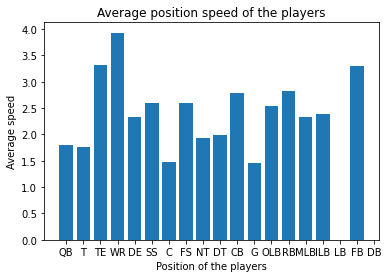

In [23]:
week_games = week_1.merge(final_players, how='left')
position = []
for i in final_players.officialPosition.unique():
    q = week_games[week_games['officialPosition'] == i]
    position.append(q['s'].mean())
plt.bar(final_players.officialPosition.unique(), position)
plt.title('Average position speed of the players')
plt.xlabel('Position of the players')
plt.ylabel('Average speed');
#The fastest players on the team are the WR and TE players, as it would be said in the problem.

In [24]:
#quantidade de jogadores por posição
players.officialPosition.value_counts()

WR     210
CB     192
DE     142
OLB    136
RB     126
T      122
TE     121
DT     114
G       99
ILB     81
FS      72
SS      69
QB      60
C       55
NT      34
MLB     27
FB      15
LB       2
DB       2
Name: officialPosition, dtype: int64

In [25]:
# Criando um dataframe de exemplo
dados_contagem = [('WR', 210), ('CB', 192), ('DE', 142), ('OLB', 136), ('RB', 126),
         ('T', 122), ('TE', 121), ('DT', 114), ('G', 99), ('ILB', 81),
         ('FS', 72), ('SS', 69), ('QB', 60), ('C', 55), ('NT', 34),
         ('MLB', 27), ('FB', 15), ('DB', 2), ('LB', 2)]

df_contagem = pd.DataFrame(dados_contagem, columns=['Posição', 'Contagem'])
df_contagem.to_excel('contagem.xlsx', index=False)

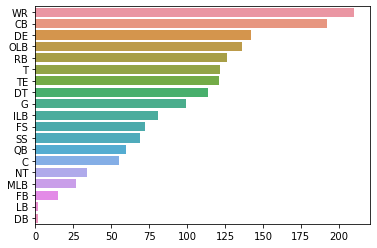

In [26]:
sb.barplot(y = players.officialPosition.value_counts().index,x = players.officialPosition.value_counts().values)
plt.show()

In [27]:
#calculando a idade de cada jogador pela data de aniversário
players.head(20)

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,age
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,44.0
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,39.0
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,39.0
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,38.0
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,39.0
5,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,37.0
6,30869,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth,40.0
7,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,36.0
8,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,36.0
9,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson,35.0


In [28]:
players.birthDate = pd.to_datetime(players.birthDate)
players.birthDate = players.birthDate.dt.strftime('%d/%m/%Y')
players.birthDate

0       03/08/1977
1       02/03/1982
2       22/01/1982
3       02/12/1983
4       24/11/1982
           ...    
1674           NaN
1675           NaN
1676           NaN
1677           NaN
1678           NaN
Name: birthDate, Length: 1679, dtype: object

In [41]:
players.birthDate = pd.to_datetime(players.birthDate)
players.birthDate

0      1977-03-08
1      1982-02-03
2      1982-01-22
3      1983-02-12
4      1982-11-24
          ...    
1674          NaT
1675          NaT
1676          NaT
1677          NaT
1678          NaT
Name: birthDate, Length: 1679, dtype: datetime64[ns]

In [42]:
from datetime import datetime, date
def age(birthdate):
#     birthdate = datetime.strptime(birthdate,"%d/%m/%Y").date()
    today = date.today()
    return today.year - birthdate.year - ((today.month, 
                                      today.day) < (birthdate.month, 
                                                    birthdate.day))
players['Idade'] = players['birthDate'].apply(age)
# Remove valores NaN da coluna 'Age'
players['Idade'].dropna(inplace=True)

# Substitui valores inf por um valor grande (por exemplo, 9999)
players['Idade'].replace([np.inf, -np.inf], 9999, inplace=True)

# Converte a coluna 'Age' em números inteiros
players['Idade'] = players['Idade'].astype('Int64')

# Exibe o DataFrame atualizado
display(players)

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,age,Age,Altura,Peso,Idade
0,25511,6-4,225,1977-03-08,Michigan,QB,Tom Brady,44.0,46,193,101,46
1,28963,6-5,240,1982-02-03,"Miami, O.",QB,Ben Roethlisberger,39.0,41,195,108,41
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,39.0,41,193,147,41
3,29851,6-2,225,1983-02-12,California,QB,Aaron Rodgers,38.0,40,187,101,40
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,39.0,40,187,102,40
...,...,...,...,...,...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaT,NaN,DT,Forrest Merrill,NaN,<NA>,185,144,<NA>
1675,53994,6-5,300,NaT,NaN,C,Ryan McCollum,NaN,<NA>,195,135,<NA>
1676,53999,6-4,312,NaT,NaN,DT,Jack Heflin,NaN,<NA>,193,140,<NA>
1677,54006,6-6,330,NaT,NaN,T,Jake Curhan,NaN,<NA>,198,148,<NA>


In [43]:
#Corrigindo a inconsistência convertendo todos os dados
# Função para converter altura em pés e polegadas para cm
def altura_para_metros(pes, polegadas):
    altura_em_cm = (pes * 12 + polegadas) * 2.54
    altura_em_metros = altura_em_cm
    return int(altura_em_metros)

# Converter altura em formato americano para padrão internacional
players['Altura'] = players['height'].apply(lambda x: altura_para_metros(int(x[0]), int(x[2])) 
                                            if '-' in x else altura_para_metros(int(x), 0))


# Função para converter o peso para Kg
def peso_para_quilos(peso_em_libras):
    peso_em_kilos = peso_em_libras * 0.45
    return int(peso_em_kilos)

# Converter peso em formato americano para padrão internacional
players['Peso'] = players['weight'].apply(lambda x: peso_para_quilos(x))
players.head(10)


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,age,Age,Altura,Peso,Idade
0,25511,6-4,225,1977-03-08,Michigan,QB,Tom Brady,44.0,46,193,101,46
1,28963,6-5,240,1982-02-03,"Miami, O.",QB,Ben Roethlisberger,39.0,41,195,108,41
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,39.0,41,193,147,41
3,29851,6-2,225,1983-02-12,California,QB,Aaron Rodgers,38.0,40,187,101,40
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,39.0,40,187,102,40
5,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,37.0,38,198,120,38
6,30869,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth,40.0,41,200,148,41
7,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,36.0,37,193,97,37
8,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,36.0,37,193,141,37
9,33130,5-10,175,1986-01-12,California,WR,DeSean Jackson,35.0,37,154,78,37


In [46]:
df_jogadores1 = pd.DataFrame(players, columns=['nflId','collegeName',
                                              'officialPosition','displayName','Idade','Altura','Peso'])
df_jogadores1.to_csv("dados_jogadores_atua1.csv", index=False)

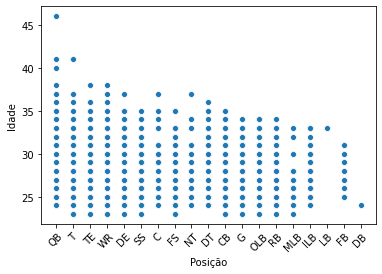

In [45]:
#relacionando a idade com a posição dos jogadores
sb.scatterplot(x = players.officialPosition, y = players.Age)
plt.xticks(rotation = 45)
plt.xlabel('Posição')
plt.ylabel('Idade')
plt.show()
#parece que a posição (DB) exige jogadores mais novos enquanto posições como a de quarterback jogadores mais velhos

In [34]:
#número de jogos por semana
games.week.value_counts()

1    16
2    16
3    16
4    16
5    16
8    15
6    14
7    13
Name: week, dtype: int64

In [35]:
dados_semana = [('Semana 1', 16), ('Semana 2', 16), ('Semana 3', 16), ('Semana 4', 16), ('Semana 5', 16), 
                ('Semana 6', 14), ('Semana 7', 13), ('Semana 8', 15)]

dados_semana = pd.DataFrame(dados_semana, columns=['Semana', 'Contagem'])
dados_semana.to_excel('dados_semana.xlsx', index=False)

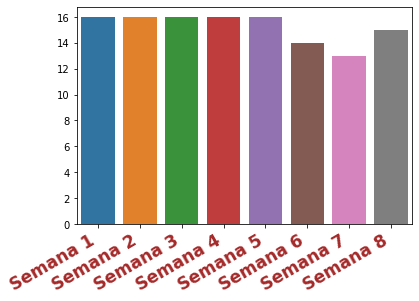

In [36]:
bars = ('Semana 1','Semana 2','Semana 3','Semana 4','Semana 5','Semana 6','Semana 7','Semana 8')
y_pos = np.arange(len(bars))
sb.barplot(x = games.week.value_counts().index, y = games.week.value_counts().values)
plt.xticks(y_pos, bars, color='brown', rotation=30, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.show()

In [37]:
#tratando a tabela games
games.isna().sum()
games.duplicated().sum()
games.rename(columns = {'gameTimeEastern' : 'start_game', 'homeTeamAbbr' : 'home', 
                     'visitorTeamAbbr' : 'away'}, inplace = True)
games.gameDate = pd.to_datetime(games.gameDate)


In [38]:
#quais dias da semana tiveram mais jogos
games['day'] = games['gameDate'].dt.day_name()
games.head()

,gameId,season,week,gameDate,start_game,home,away,day
0,2021090900,2021,1,2021-09-09,20:20:00,TB,DAL,Thursday
1,2021091200,2021,1,2021-09-12,13:00:00,ATL,PHI,Sunday
2,2021091201,2021,1,2021-09-12,13:00:00,BUF,PIT,Sunday
3,2021091202,2021,1,2021-09-12,13:00:00,CAR,NYJ,Sunday
4,2021091203,2021,1,2021-09-12,13:00:00,CIN,MIN,Sunday


In [39]:
colunas = {
    'gameId': 'id_jogo',
    'season': 'temporada',
    'week': 'semana',
    'gameDate': 'data_jogo',
    'start_game': 'horario_jogo',
    'home': 'time_casa',
    'away': 'time_visitante',
    'day': 'dia'
}

# Carrega os dados em um dataframe do Pandas
df_dias = pd.read_csv('dados_dias.csv')

# Renomeia as colunas usando o método "rename" do Pandas
df_dias = df.rename(columns=colunas)

# Cria um dicionário de mapeamento para os dias
dias = {
    'Sunday': 'Domingo',
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado'
}

# Aplica a conversão para português na coluna "dia"
df['dia'] = df['dia'].map(dias)

NameError: name 'df' is not defined

In [ ]:
df_dias.head(5)

In [ ]:
df_dias_arquivo = pd.DataFrame(df_dias, columns=['id_jogo','temporada',
                                              'semana','dia'])
df_dias_arquivo.to_csv("dados_dias_port.csv", index=False)

In [ ]:
games.day.value_counts()
#domingo

In [ ]:
fig = plt.figure(figsize =(7, 5))
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax1.pie(games.day.value_counts(), labels=games.day.value_counts().index
        , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
plays.head(5)

In [ ]:
#possessão de bola por time
plays.possessionTeam.value_counts()
#KC foi o time que teve melhor desempenho nesse quesito

In [ ]:
plt.figure(figsize = [10,7])
sb.barplot(y = plays.possessionTeam.value_counts().index, x = plays.possessionTeam.value_counts().values)
plt.title('Possessão por time')
plt.show()

In [ ]:
#time que foi mais defensivo
plays.defensiveTeam.value_counts()
#CIN foi o time mais defensivo

In [ ]:
plt.figure(figsize = [10,7])
sb.barplot(y = plays.defensiveTeam.value_counts().index, x = plays.defensiveTeam.value_counts().values)
plt.title('the defensiveTeam of each team')
plt.show()

In [ ]:
import pandas as pd

# Use uma string bruta para o caminho do arquivo
path = r"C:\Users\fhnis\anaconda3\envs\envpowerbi\Projeto NFL Jp\dados_jogadores.csv"

# Leia o arquivo usando o caminho corrigido
df = pd.read_csv(path)

# Faça o processamento dos dados
...
